In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
# from sklearn.metrics import accuracy_score    # It is meant for classification problems.
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
# `load_boston` has been removed from scikit-learn since version 1.2.

In [3]:
# Importing the boston house price dataset.
boston_dataset=pd.read_csv('/content/boston.csv')

In [4]:
boston_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
boston_dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
boston_dataset.shape

(506, 14)

Correlation and heatmap

<Axes: >

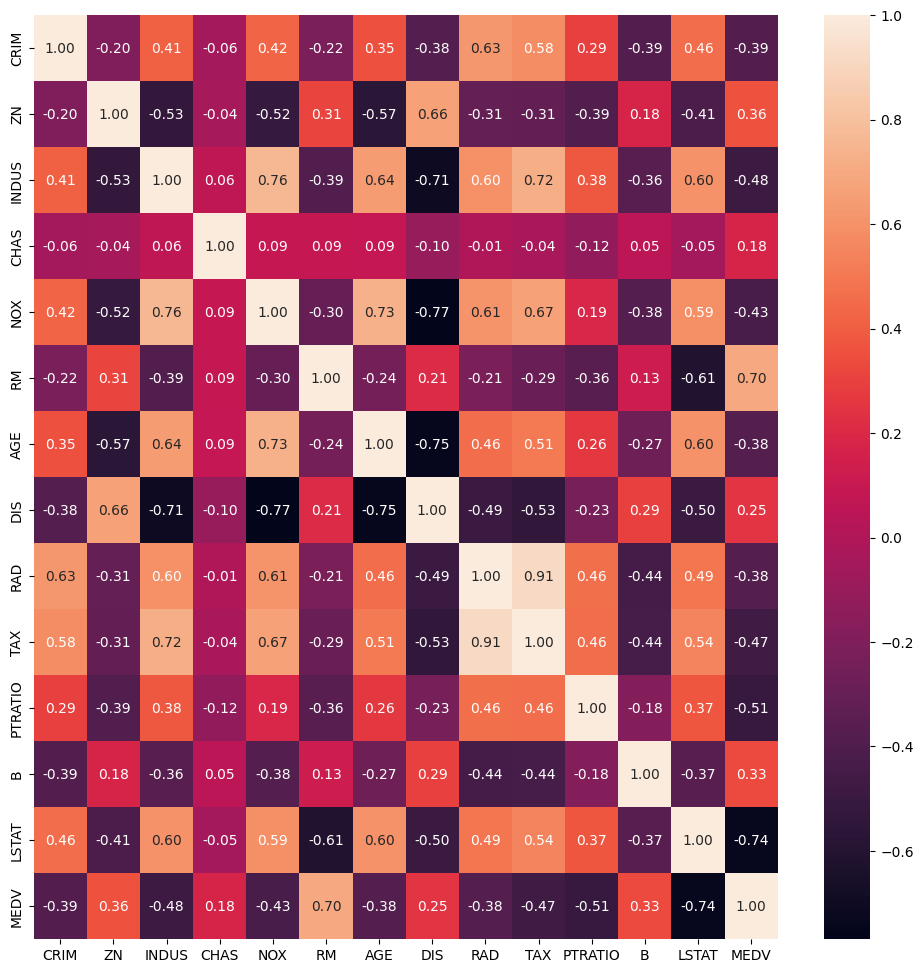

In [7]:
plt.figure(figsize=(12,12))
sns.heatmap(boston_dataset.corr(),fmt='.2f',annot=True)

In [8]:
# Checking the null(NaN) values in the dataset.
boston_dataset.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


Splitting the features and target

In [9]:
X=boston_dataset.drop('MEDV',axis=1)
Y=boston_dataset['MEDV']

In [10]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [11]:
Y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


Splitting the Dataset into training and testing data

In [12]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=2)

In [13]:
X.shape,x_train.shape,x_test.shape

((506, 13), (354, 13), (152, 13))

Training The Dataset.

In [14]:
model=LinearRegression()                           # model=XGBRegressor()

In [15]:
model.fit(x_train,y_train)

LinearRegression()

In [16]:
# Coefficients are not defined for Booster type None

print('Model Coefficient',model.coef_)             # Y=MX+B --> M is the Coefficients.
print()
print('Model Intercept',model.intercept_)          # B is the Intercept.

Model Coefficient [-9.32979504e-02  3.11368143e-02 -1.81754255e-02  3.19555762e+00
 -1.51042926e+01  3.50102142e+00  1.89769212e-02 -1.26552555e+00
  3.22156319e-01 -1.09456764e-02 -1.08963451e+00  1.25396786e-02
 -6.07618971e-01]

Model Intercept 37.16254129502903


# SCORE CHECKING OR MODEL EVALUATION

R- Squared Score
* score==1.  A perfect fit.
* score==0.  The model doesn't explain any variance.
* score<0.   It indicates a poor fit.

In [17]:
x_train_prrediction=model.predict(x_train)
training_data_accuracy=r2_score(x_train_prrediction,y_train)
print('R2 Score of Training Data',training_data_accuracy)

R2 Score of Training Data 0.6414128869835778


In [18]:
x_test_prrediction=model.predict(x_test)
testing_data_accuracy=r2_score(x_test_prrediction,y_test)
print("Predicted target value on Testing Data :",x_test_prrediction)
print("Actual Target value of Testing Data :",y_test)
print('R2 Score of Testing Data',testing_data_accuracy)

Predicted target value on Testing Data : [23.60107664 22.04294254 32.92377058 31.91022563  2.99227543  2.30931786
 27.24307664 22.22378555 15.63121244 22.01776894 30.9081731  26.25867172
 20.98500214 18.08561794 17.48148297 25.66225133 24.17903047 13.46872099
  8.11358881 18.98082595 21.86465498 20.25622265 36.91155565 20.90909029
 20.24640709 15.37190713 37.80616835 34.6731445  30.31794568 23.04231982
 18.92214187 20.75992822 31.34205264 29.76580943 13.8418402  16.3196928
 13.75124615 24.26067475 25.9231117  22.99977788 28.75660688 12.3235743
 31.16617755  6.53718251 23.88496902 20.92276495 33.16629819 19.57388844
 36.464448    0.10366224 32.10365338 31.71501622  6.71303034 34.63579086
 20.89498886 19.84248247 19.63295005 18.5086544  15.86301943 22.63989081
 19.71274635 16.11818655 18.44773944 32.47889806 35.32691618 24.55178159
 40.85972609 33.06546131 14.79984596 27.22346248  7.22231092  5.40484743
 22.18509672 18.79691526 31.28821411 26.18611658 25.1000157  24.89566349
 24.87200931

Mean_Squared_Error(MSE).
* MSE=0 . Perfect Prediction with no error.
* Smaller MSE . The model's Prediction are close to actual values.
* Larger MSE.   The model is making bigger errors in its prediction.

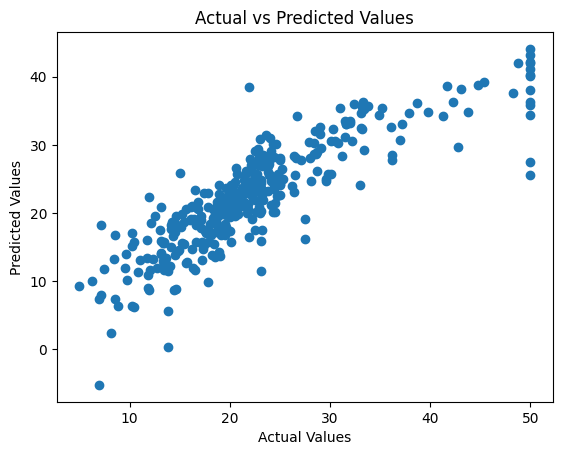

In [19]:
plt.scatter(y_train,x_train_prrediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [20]:
x_train_prrediction=model.predict(x_train)
training_data_accuracy=mean_squared_error(x_train_prrediction,y_train)
print('Mean Squared Error of Training Data',training_data_accuracy)

Mean Squared Error of Training Data 22.06776559918013


In [21]:
x_test_prrediction=model.predict(x_test)
testing_data_accuracy=mean_squared_error(x_test_prrediction,y_test)
print('Mean Squared Error of Testing Data',testing_data_accuracy)

Mean Squared Error of Testing Data 23.038812866283564


Mean_Absolute_Error(MAE).
* MAE=0.   Perfect prediction ( no erroe).
* MAE>0.  There's some error in the prediction, with higher values
    indicating a worse model.

In [22]:
x_train_prrediction=model.predict(x_train)
training_data_accuracy=mean_absolute_error(x_train_prrediction,y_train)
print('Mean Absolute Error of Training Data',training_data_accuracy)

Mean Absolute Error of Training Data 3.3630623701098465


In [23]:
x_test_prrediction=model.predict(x_test)
testing_data_accuracy=mean_absolute_error(x_test_prrediction,y_test)
print('Mean Absolute Error of Testing Data',testing_data_accuracy)

Mean Absolute Error of Testing Data 3.3929547821817967


In [24]:
input_data=(0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98)
input_data_as_numpy_array=np.asarray(input_data)
input_data_as_numpy_array_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_as_numpy_array_reshaped)
print(prediction)

[30.99671542]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# We can train this dataset using the **XGBRegressor**
for this we have to first import :

 from xgboost import XGBRegressor

and then  
 model=XGBRegressor()

# ***END***